In [ ]:
import time
import re

from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
import pandas as pd
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,LabelEncoder,FunctionTransformer,StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection  import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score,GridSearchCV
import pickle

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

In [ ]:
with open('C:/Users/harshit/Desktop/datasets/ipl dataset/smartprix.html','r',encoding='utf-8') as f:
    data=f.read()


In [ ]:
soup=BeautifulSoup(data,"lxml")

In [ ]:
containers = soup.find_all('div',{'class':'sm-product has-tag has-features has-actions'})


In [ ]:
names = []
prices = []
ratings = []
sim = []
processor = []
ram = []
battery = []
display = []
camera = []
card = []
os = []

for i in soup.find_all('div',{'class':'sm-product has-tag has-features has-actions'}):
    try:
        names.append(i.find('h2').text)
    except:
        names.append(np.nan)
    try:
        prices.append(i.find('span',{'class':'price'}).text)
    except:
        price.append(np.nan)
    try:
        ratings.append(i.find('div',{'class':'score rank-2-bg'}).find('b').text)
    except:
        ratings.append(np.nan)

    x = i.find('ul',{'class':'sm-feat specs'}).find_all('li')
    try:
        sim.append(x[0].text)
    except:
        sim.append(np.nan)
    try:
        processor.append(x[1].text)
    except:
        processor.append(np.nan)
    try:
        ram.append(x[2].text)
    except:
        ram.append(np.nan)
    try:
        battery.append(x[3].text)
    except:
        battery.append(np.nan)
    try:
        display.append(x[4].text)
    except:
        display.append(np.nan)
    try:
        camera.append(x[5].text)
    except:
        camera.append(np.nan)
    try:
        card.append(x[6].text)
    except:
        card.append(np.nan)
    try:
        os.append(x[7].text)
    except:
        os.append(np.nan)


In [ ]:
df = pd.DataFrame({
    'model':names,
    'price':prices,
    'rating':ratings,
    'sim':sim,
    'processor':processor,
    'ram':ram,
    'battery':battery,
    'display':display,
    'camera':camera,
    'card':card,
    'os':os
})

# Price

In [ ]:
df["price"]=df["price"].str.replace(",","")
df["price"]=df["price"].str.replace("₹","")
df["price"]=df["price"].astype("float")

In [ ]:
df=df[df["price"]>5000]

In [ ]:
df["price"].isnull().sum()

0

# Pixels

In [ ]:
df['pixel1']=df['display'].str.extract(r'\s([0-9]*)\sx')
df['pixel2']=df['display'].str.extract(r'x\s([0-9]*)')

In [ ]:
df["pixel1"].isnull().sum()

14

In [ ]:
temp=df[df["pixel1"].isnull()]

In [ ]:
temp.drop([835,783],axis=0,inplace=True)
temp=temp.index

C:\Users\harshit\AppData\Local\Temp\ipykernel_5492\2467469725.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp.drop([835,783],axis=0,inplace=True)


In [ ]:
df.loc[835,["processor","ram","battery","display","camera","card"]]=df.loc[835,["ram","battery","display","camera","card","os"]].values

In [ ]:
df.loc[temp,['display',"camera","card","os"]]=df.loc[temp,["battery",'display',"camera","card"]].values

In [ ]:
df.loc[783,["ram","battery","display","camera","card","os"]]=df.loc[783,["processor","ram","battery","display","camera","card"]].values


In [ ]:
df['pixel1']=df['display'].str.extract(r'\s([0-9]*)\sx')
df['pixel2']=df['display'].str.extract(r'x\s([0-9]*)')

In [ ]:
df["pixel2"].isnull().sum()

0

In [ ]:
df.drop([993],axis=0,inplace=True)

# Company

In [ ]:
df["company"]=df["model"].str.extract(r'([A-z]*[a-z]*)\s')

In [ ]:
df["company"].isnull().sum()

0

# Battery

In [ ]:
df["battery_capacity"]=df["battery"].str.extract(r'([0-9]+)\sm')

In [ ]:
df["battery_capacity"].isnull().sum()

12

In [ ]:
df["charger_capacity"]=df["battery"].str.extract(r'([0-9]*)W')


In [ ]:
df["fast_charging"]=df["battery"].str.extract(r'(F[a-z]*\sC[a-z]*)')
df["fast_charging"]=df["fast_charging"].apply(lambda x : 1 if x == "Fast Charging" else 0)

In [ ]:
df["battery_capacity"].isnull().sum()

12

In [ ]:
df["charger_capacity"].isnull().sum()

287

In [ ]:
df["charger_capacity"].value_counts()

18     141
33     123
25      48
15      46
30      35
10      28
65      25
67      23
80      19
120     17
44      15
20      14
66      13
45       7
150      5
50       4
60       3
5        3
68       2
125      2
27       2
180      1
19       1
Name: charger_capacity, dtype: int64


# Ram

In [ ]:
df["ram_capacity"]=df["ram"].str.extract(r'([0-9]*\s[A-Z]B)\sR')

In [ ]:
df["rom"]=df["ram"].str.extract(r'([0-9]*\sGB\sinbuilt|[0-9]*\sTB\sinbuilt|[0-9]*\sMB\sinbuilt)')

#  Sim

In [ ]:
df["5G"]=df["sim"].str.extract(r'(5G)')
df["5G"]=df["5G"].apply(lambda x: "yes" if x=="5G" else "no")


In [ ]:
df["nfc"]=df["sim"].str.extract(r'(NFC)')
df['nfc']=df["nfc"].apply(lambda x : "yes" if x =="NFC" else "no")

In [ ]:
# data=df["model"].str.split(" ")
# df["name"]=data.apply(lambda x : x[0])     # name extract dusri tarike se

# processor

In [ ]:
df["processor_name"]=df["processor"].str.extract(r'([A-Z]+[a-z]*[0-9]*[A-Z]*)\W')

In [ ]:
df["processor_name"].value_counts()

Snapdragon    308
Helio         253
Dimensity     107
Exynos         48
Bionic         40
Unisoc         31
Tiger          19
Quad           16
Qualcomm        9
Octa            7
A13             7
Google          6
SC9863A         3
Kirin           3
Spreadtrum      2
Fusion          1
UNISOC          1
GB              1
MT              1
Name: processor_name, dtype: int64

In [ ]:
df.replace({"processor_name":{"A13":"Bionic","UNISOC":"Unisoc","Fusion":"Bionic","GB":"Unisoc","MT":"Quad","SC9863A":"Unisoc"}},inplace=True)

In [ ]:
df["processor_name"].value_counts()

Snapdragon    308
Helio         253
Dimensity     107
Exynos         48
Bionic         48
Unisoc         36
Tiger          19
Quad           17
Qualcomm        9
Octa            7
Google          6
Kirin           3
Spreadtrum      2
Name: processor_name, dtype: int64

In [ ]:
df["processor_cores"]=df["processor"].str.extract(r'([A-Z]*[a-z]*)\sC[a-z]*')

In [ ]:
df[df["processor_cores"].isnull()]

,model,price,rating,sim,processor,ram,battery,display,camera,card,...,company,battery_capacity,charger_capacity,fast_charging,ram_capacity,rom,5G,nfc,processor_name,processor_cores
646,Lava Yuva Pro,7799.0,NaN,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi",Helio,"3 GB RAM, 32 GB inbuilt",5000 mAh Battery with 10W Fast Charging,"6.52 inches, 1600 x 720 px Display with Water ...",13 MP + Depth Sensor Triple Rear & 8 MP Front ...,"Memory Card Supported, upto 512 GB",...,Lava,5000,10,1,3 GB,32 GB inbuilt,no,no,NaN,NaN
783,Lava Z21,5299.0,NaN,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi","2 GB RAM, 32 GB inbuilt","2 GB RAM, 32 GB inbuilt",3100 mAh Battery,"5 inches, 480 x 854 px Display",5 MP Rear & 2 MP Front Camera,"Memory Card Supported, upto 256 GB",...,Lava,3100,NaN,0,2 GB,32 GB inbuilt,no,no,Unisoc,NaN


In [ ]:
df["processor_cores"]=df["processor_cores"].fillna("Quad")

In [ ]:
df["processor_speed"]=df["processor"].str.extract(r',\s([0-9]*\.[0-9]+|[0-9]*)\sGHz')

# Screen Size

In [ ]:
df["screen_size"]=df["display"].str.extract(r'([0-9]*\.[0-9]+|[0-9]*)\sinches')

In [ ]:
df['refresh_rate']=df["display"].str.extract(r'([0-9]*)\sHz')

In [ ]:
df[df["refresh_rate"].isnull()]

,model,price,rating,sim,processor,ram,battery,display,camera,card,...,fast_charging,ram_capacity,rom,5G,nfc,processor_name,processor_cores,processor_speed,screen_size,refresh_rate
5,Apple iPhone 14,66999.0,81,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A15, Hexa Core, 3.22 GHz Processor","6 GB RAM, 128 GB inbuilt",3279 mAh Battery with Fast Charging,"6.1 inches, 1170 x 2532 px Display with Small ...",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,...,1,6 GB,128 GB inbuilt,yes,yes,Bionic,Hexa,3.22,6.1,NaN
9,Samsung Galaxy A23,18499.0,79,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi","Snapdragon 680, Octa Core, 2.4 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 25W Fast Charging,"6.6 inches, 1080 x 2408 px Display with Water ...",50 MP Quad Rear & 8 MP Front Camera,"Memory Card Supported, upto 1 TB",...,1,6 GB,128 GB inbuilt,no,no,Snapdragon,Octa,2.4,6.6,NaN
14,Apple iPhone 13,61999.0,79,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A15, Hexa Core, 3.22 GHz Processor","4 GB RAM, 128 GB inbuilt",3240 mAh Battery with Fast Charging,"6.1 inches, 1170 x 2532 px Display with Small ...",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,...,1,4 GB,128 GB inbuilt,yes,yes,Bionic,Hexa,3.22,6.1,NaN
15,Vivo Y16,9999.0,65,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi","Helio P35, Octa Core, 2.3 GHz Processor","3 GB RAM, 32 GB inbuilt",5000 mAh Battery with 10W Fast Charging,"6.51 inches, 720 x 1600 px Display with Water ...",13 MP + 2 MP Dual Rear & 5 MP Front Camera,Memory Card Supported,...,1,3 GB,32 GB inbuilt,no,no,Helio,Octa,2.3,6.51,NaN
20,Vivo Y22,14499.0,72,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi","Helio G70, Octa Core, 2 GHz Processor","4 GB RAM, 64 GB inbuilt",5000 mAh Battery with 18W Fast Charging,"6.55 inches, 720 x 1612 px Display with Water ...",50 MP + 2 MP Dual Rear & 8 MP Front Camera,"Memory Card Supported, upto 1 TB",...,1,4 GB,64 GB inbuilt,no,no,Helio,Octa,2,6.55,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
983,Google Pixel 2,19000.0,68,"Single Sim, 3G, 4G, VoLTE, Wi-Fi, NFC","Snapdragon 835, Octa Core, 2.45 GHz Processor","4 GB RAM, 128 GB inbuilt",2700 mAh Battery with Fast Charging,"5 inches, 1080 x 1920 px Display",12.2 MP Rear & 8 MP Front Camera,Memory Card Not Supported,...,1,4 GB,128 GB inbuilt,no,yes,Snapdragon,Octa,2.45,5,NaN
984,Lyf F1s,5099.0,60,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi","Snapdragon 652, Octa Core, 1.8 GHz Processor","3 GB RAM, 32 GB inbuilt",3000 mAh Battery,"5.2 inches, 1080 x 1920 px Display",16 MP Rear & 5 MP Front Camera,"Memory Card (Hybrid), upto 128 GB",...,0,3 GB,32 GB inbuilt,no,no,Snapdragon,Octa,1.8,5.2,NaN
989,Vivo V3,17500.0,NaN,"Dual Sim, 3G, 4G, Wi-Fi","Snapdragon 616, Octa Core, 1.5 GHz Processor","3 GB RAM, 32 GB inbuilt",2550 mAh Battery,"5 inches, 720 x 1280 px Display",13 MP Rear & 8 MP Front Camera,"Memory Card Supported, upto 128 GB",...,0,3 GB,32 GB inbuilt,no,no,Snapdragon,Octa,1.5,5,NaN
991,Samsung Galaxy J7,8990.0,NaN,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi","Exynos 7580, Octa Core, 1.5 GHz Processor","1.5 GB RAM, 16 GB inbuilt",3000 mAh Battery,"5.5 inches, 720 x 1280 px Display",13 MP Rear & 5 MP Front Camera,"Memory Card Supported, upto 128 GB",...,0,5 GB,16 GB inbuilt,no,no,Exynos,Octa,1.5,5.5,NaN


# Camera

In [ ]:
df["rear_camera"]=df["camera"].str.extract(r'([0-9]+)\sMP')

In [ ]:
temp=df[df["rear_camera"].isnull()].index
df[df["rear_camera"].isnull()]

,model,price,rating,sim,processor,ram,battery,display,camera,card,...,ram_capacity,rom,5G,nfc,processor_name,processor_cores,processor_speed,screen_size,refresh_rate,rear_camera
124,Samsung Galaxy Z Flip 3,69999.0,84,"Single Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 888, Octa Core, 2.84 GHz Processor","8 GB RAM, 128 GB inbuilt",3300 mAh Battery with 15W Fast Charging,"6.7 inches, 1080 x 2640 px, 120 Hz Display wit...","Foldable Display, Dual Display",12 MP + 12 MP Dual Rear & 10 MP Front Camera,...,8 GB,128 GB inbuilt,yes,yes,Snapdragon,Octa,2.84,6.7,120,NaN
242,Samsung Galaxy Z Fold 4,146999.0,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8+ Gen1, Octa Core, 3.2 GHz Processor","12 GB RAM, 256 GB inbuilt",4400 mAh Battery with 25W Fast Charging,"7.6 inches, 1812 x 2176 px, 120 Hz Display wit...","Foldable Display, Dual Display",50 MP + 12 MP + 10 MP Triple Rear & 10 MP + 4 ...,...,12 GB,256 GB inbuilt,yes,yes,Snapdragon,Octa,3.2,7.6,120,NaN
326,Samsung Galaxy Z Flip 4 5G,82999.0,88,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8+ Gen1, Octa Core, 3.2 GHz Processor","8 GB RAM, 128 GB inbuilt",3700 mAh Battery with 25W Fast Charging,"6.7 inches, 1080 x 2640 px, 120 Hz Display wit...","Foldable Display, Dual Display",12 MP + 12 MP Dual Rear & 10 MP Front Camera,...,8 GB,128 GB inbuilt,yes,yes,Snapdragon,Octa,3.2,6.7,120,NaN
347,LG Wing 5G,54999.0,89,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 765G , Octa Core, 2.4 GHz Processor","8 GB RAM, 128 GB inbuilt",4000 mAh Battery with Fast Charging,"6.8 inches, 1080 x 2460 px Display",Dual Display,64 MP + 13 MP + 12 MP Triple Rear & 32 MP Fron...,...,8 GB,128 GB inbuilt,yes,yes,Snapdragon,Octa,2.4,6.8,NaN,NaN
438,Samsung Galaxy Z Fold 3,110999.0,89,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 888, Octa Core, 2.84 GHz Processor","12 GB RAM, 256 GB inbuilt",4400 mAh Battery with 25W Fast Charging,"7.6 inches, 1768 x 2208 px, 120 Hz Display wit...","Foldable Display, Dual Display",12 MP + 12 MP + 12 MP Triple Rear & 10 MP + 4 ...,...,12 GB,256 GB inbuilt,yes,yes,Snapdragon,Octa,2.84,7.6,120,NaN
527,Samsung Galaxy Z Fold 4 (12GB RAM + 1TB),163980.0,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8+ Gen1, Octa Core, 3.2 GHz Processor","12 GB RAM, 1 TB inbuilt",4400 mAh Battery with 25W Fast Charging,"7.6 inches, 1812 x 2176 px, 120 Hz Display wit...","Foldable Display, Dual Display",50 MP + 12 MP + 10 MP Triple Rear & 10 MP + 4 ...,...,12 GB,1 TB inbuilt,yes,yes,Snapdragon,Octa,3.2,7.6,120,NaN
607,Samsung Galaxy Z Fold 4 (12GB RAM + 512GB),156999.0,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8+ Gen1, Octa Core, 3.2 GHz Processor","12 GB RAM, 512 GB inbuilt",4400 mAh Battery with 25W Fast Charging,"7.6 inches, 1812 x 2176 px, 120 Hz Display wit...","Foldable Display, Dual Display",50 MP + 12 MP + 10 MP Triple Rear & 10 MP + 4 ...,...,12 GB,512 GB inbuilt,yes,yes,Snapdragon,Octa,3.2,7.6,120,NaN
663,Samsung Galaxy Z Flip 3 5G (8GB RAM + 256GB),83999.0,85,"Single Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 888, Octa Core, 2.84 GHz Processor","8 GB RAM, 256 GB inbuilt",3300 mAh Battery with 15W Fast Charging,"6.7 inches, 1080 x 2640 px, 120 Hz Display wit...","Foldable Display, Dual Display",12 MP + 12 MP Dual Rear & 10 MP Front Camera,...,8 GB,256 GB inbuilt,yes,yes,Snapdragon,Octa,2.84,6.7,120,NaN
703,Samsung Galaxy Z Flip 4 (8GB RAM + 256GB),94999.0,88,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8+ Gen1, Octa Core, 3.2 GHz Processor","8 GB RAM, 256 GB inbuilt",3700 mAh Battery with 25W Fast Charging,"6.7 inches, 1080 x 2640 px, 120 Hz Display wit...","Foldable Display, Dual Display",12 MP + 12 MP Dual Rear & 10 MP Front Camera,...,8 GB,256 GB inbuilt,yes,yes,Snapdragon,Octa,3.2,6.7,120,NaN
792,Samsung Galaxy Z Fold 3 5G (12GB RAM + 512GB),101800.0,89,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 888, Octa Core, 2.84 GHz Processor","12 GB RAM, 512 GB inbuilt",4400 mAh Battery with 25W Fast Charging,"7.6 in

In [ ]:
df.loc[temp,["camera","card"]]=df.loc[temp,["card","os"]].values

In [ ]:
df["rear_camera"]=df["camera"].str.extract(r'([0-9]+)\sMP')


In [ ]:
df["rear_camera_count"]=df["camera"].str.extract(r'(T[a-z]*|Dual|Q[a-z]*)\s[A-za-z\s]*&')


In [ ]:

df["rear_camera_count"]=df["rear_camera_count"].fillna("single")

In [ ]:
df["rear_camera_count"].value_counts()

Triple    407
Dual      196
Quad      161
single    100
Name: rear_camera_count, dtype: int64

In [ ]:
df["front_camera"]=df["camera"].str.extract(r'&\s([0-9]+|[0-9]*\.[0-9]+)\sMP')

In [ ]:
df["front_camera_count"]=df["camera"].str.extract(r'(T[a-z]*|Dual*|Q[a-z]*)\sFront').fillna("Single")

In [ ]:
df[df["front_camera"].isnull()]

,model,price,rating,sim,processor,ram,battery,display,camera,card,...,nfc,processor_name,processor_cores,processor_speed,screen_size,refresh_rate,rear_camera,rear_camera_count,front_camera,front_camera_count
925,CAT S42,21999.0,62,"Dual Sim, 3G, 4G, Wi-Fi","Helio A20, Deca Core, 1.8 GHz Processor","3 GB RAM, 32 GB inbuilt",4200 mAh Battery,"5.5 inches, 1440 x 720 px Display",13 MP Rear Camera,"Memory Card (Hybrid), upto 128 GB",...,no,Helio,Deca,1.8,5.5,NaN,13,single,NaN,Single


# os

In [ ]:
df["os_type"]=df["os"].str.extract(r'(A[a-z]*|iOS|Ho[a-z]*|Bla[a-z]*)')

In [ ]:
temp=df[df["os_type"].isnull()].index

In [ ]:
df.loc[temp,"os"]=df.loc[temp,"card"]

In [ ]:
df[df["os_type"].isnull()].iloc[:,2:13]   # just checking if values are changed or not

,rating,sim,processor,ram,battery,display,camera,card,os,pixel1,pixel2
8,84,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Dimensity 1300, Octa Core, 3 GHz Processor","8 GB RAM, 128 GB inbuilt",4500 mAh Battery with 80W Fast Charging,"6.43 inches, 1080 x 2400 px, 90 Hz Display wit...",50 MP + 8 MP + 2 MP Triple Rear & 32 MP Front ...,Android v12,Android v12,1080,2400
11,79,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, IR Blaster","Dimensity 1080, Octa Core, 2.6 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 67W Fast Charging,"6.67 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,Android v12,Android v12,1080,2400
12,85,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 778G Plus, Octa Core, 2.5 GHz Proce...","8 GB RAM, 128 GB inbuilt",4500 mAh Battery with 33W Fast Charging,"6.55 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 50 MP Dual Rear & 16 MP Front Camera,Android v12,Android v12,1080,2400
17,85,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Dimensity 1300, Octa Core, 3 GHz Processor","8 GB RAM, 128 GB inbuilt",4830 mAh Battery with 66W Fast Charging,"6.56 inches, 1080 x 2376 px, 120 Hz Display wi...",64 MP + 8 MP + 2 MP Triple Rear & 32 MP Front ...,Android v12,Android v12,1080,2376
18,86,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Dimensity 8100 Max, Octa Core, 2.85 GHz Processor","8 GB RAM, 128 GB inbuilt",5000 mAh Battery with 80W Fast Charging,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,Android v12,Android v12,1080,2412
...,...,...,...,...,...,...,...,...,...,...,...
835,75,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi","Helio G90T, Octa Core, 2.05 GHz Processor","4 GB RAM, 64 GB inbuilt",4300 mAh Battery with 30W Fast Charging,"6.5 inches, 1080 x 2400 px, 90 Hz Display with...",48 MP Quad Rear & 16 MP Front Camera,"Memory Card Supported, upto 256 GB","Memory Card Supported, upto 256 GB",1080,2400
880,85,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Dimensity 8100, Octa Core, 2.85 GHz Processor","12 GB RAM, 256 GB inbuilt",5000 mAh Battery with 150W Fast Charging,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,Android v12,Android v12,1080,2412
893,83,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 870, Octa Core, 3.2 GHz Processor","12 GB RAM, 256 GB inbuilt",5000 mAh Battery with 65W Fast Charging,"6.62 inches, 2400 x 1080 px, 120 Hz Display wi...",64 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,Android v11,Android v11,2400,1080
917,89,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Exynos 2100, Octa Core, 2.9 GHz Processor","8 GB RAM, 256 GB inbuilt",4800 mAh Battery with 25W Fast Charging,"6.7 inches, 1080 x 2400 px, 120 Hz Display wit...",64 MP + 12 MP + 12 MP Triple Rear & 10 MP Fron...,Android v10,Android v10,1080,2400


In [ ]:
df["os_type"]=df["os"].str.extract(r'(A[a-z]*|iOS|Ho[a-z]*|Bla[a-z]*)')

In [ ]:
df["os_type"]=df["os_type"].fillna("Android")

In [ ]:
df["os_type"].value_counts()

Android       814
iOS            48
Hongmeng        1
Blackberry      1
Name: os_type, dtype: int64

# Cleaning Data

In [ ]:
dfnew = df.iloc[:,11:]
dfnew=pd.concat([dfnew,df[["price","rating"]]],axis=1)

In [ ]:
dfnew.columns

Index(['pixel1', 'pixel2', 'company', 'battery_capacity', 'charger_capacity',
       'fast_charging', 'ram_capacity', 'rom', '5G', 'nfc', 'processor_name',
       'processor_cores', 'processor_speed', 'screen_size', 'refresh_rate',
       'rear_camera', 'rear_camera_count', 'front_camera',
       'front_camera_count', 'os_type', 'price', 'rating'],
      dtype='object')

In [ ]:
dfnew.dtypes

pixel1                 object
pixel2                 object
company                object
battery_capacity       object
charger_capacity       object
fast_charging           int64
ram_capacity           object
rom                    object
5G                     object
nfc                    object
processor_name         object
processor_cores        object
processor_speed        object
screen_size            object
refresh_rate           object
rear_camera            object
rear_camera_count      object
front_camera           object
front_camera_count     object
os_type                object
price                 float64
rating                 object
dtype: object

In [ ]:
dfnew.head()

,pixel1,pixel2,company,battery_capacity,charger_capacity,fast_charging,ram_capacity,rom,5G,nfc,...,processor_speed,screen_size,refresh_rate,rear_camera,rear_camera_count,front_camera,front_camera_count,os_type,price,rating
0,1080,2412,OnePlus,5000,33,1,6 GB,128 GB inbuilt,yes,no,...,2.2,6.59,120,64,Triple,16,Single,Android,18999.0,81
1,1080,2408,Samsung,5000,15,1,4 GB,64 GB inbuilt,yes,no,...,2.4,6.6,90,50,Triple,13,Single,Android,16499.0,75
2,1080,2408,Samsung,5000,25,1,6 GB,128 GB inbuilt,yes,yes,...,2.2,6.6,120,50,Triple,8,Single,Android,16999.0,80
3,1080,2400,Motorola,5000,NaN,1,6 GB,128 GB inbuilt,yes,no,...,2.2,6.55,120,50,Triple,16,Single,Android,14999.0,81
4,1080,2412,Realme,5000,67,1,6 GB,128 GB inbuilt,yes,no,...,2.6,6.7,120,108,Triple,16,Single,Android,24999.0,82


In [ ]:
col=["pixel1","pixel2","battery_capacity","charger_capacity","refresh_rate","rear_camera","rating","fast_charging"]
dfnew[["processor_speed","screen_size","front_camera"]]=dfnew[["processor_speed","screen_size","front_camera"]].astype("float")
dfnew[col]=df[col].astype("Int64")

In [ ]:
dfnew.dtypes

pixel1                  Int64
pixel2                  Int64
company                object
battery_capacity        Int64
charger_capacity        Int64
fast_charging           Int64
ram_capacity           object
rom                    object
5G                     object
nfc                    object
processor_name         object
processor_cores        object
processor_speed       float64
screen_size           float64
refresh_rate            Int64
rear_camera             Int64
rear_camera_count      object
front_camera          float64
front_camera_count     object
os_type                object
price                 float64
rating                  Int64
dtype: object

In [ ]:
dfnew.head()

,pixel1,pixel2,company,battery_capacity,charger_capacity,fast_charging,ram_capacity,rom,5G,nfc,...,processor_speed,screen_size,refresh_rate,rear_camera,rear_camera_count,front_camera,front_camera_count,os_type,price,rating
0,1080,2412,OnePlus,5000,33,1,6 GB,128 GB inbuilt,yes,no,...,2.2,6.59,120,64,Triple,16.0,Single,Android,18999.0,81
1,1080,2408,Samsung,5000,15,1,4 GB,64 GB inbuilt,yes,no,...,2.4,6.60,90,50,Triple,13.0,Single,Android,16499.0,75
2,1080,2408,Samsung,5000,25,1,6 GB,128 GB inbuilt,yes,yes,...,2.2,6.60,120,50,Triple,8.0,Single,Android,16999.0,80
3,1080,2400,Motorola,5000,<NA>,1,6 GB,128 GB inbuilt,yes,no,...,2.2,6.55,120,50,Triple,16.0,Single,Android,14999.0,81
4,1080,2412,Realme,5000,67,1,6 GB,128 GB inbuilt,yes,no,...,2.6,6.70,120,108,Triple,16.0,Single,Android,24999.0,82


In [ ]:
dfnew["ram_capacity"]=dfnew["ram_capacity"].str.extract(r'([0-9]*)\s')

In [ ]:
dfnew["rom"]=dfnew["rom"].replace("1 TB inbuilt" ,"1024 GB inbuilt")

In [ ]:
dfnew["rom"]=dfnew["rom"].str.extract(r'([0-9]*)\s')

In [ ]:
dfnew[["rom","ram_capacity"]]=dfnew[["rom","ram_capacity"]].astype("Int64")

In [ ]:
dfnew.shape

(864, 22)

In [ ]:
dfnew.isnull().sum()

pixel1                  0
pixel2                  0
company                 0
battery_capacity       12
charger_capacity      287
fast_charging           0
ram_capacity            4
rom                     0
5G                      0
nfc                     0
processor_name          1
processor_cores         0
processor_speed        14
screen_size             0
refresh_rate          451
rear_camera             0
rear_camera_count       0
front_camera            1
front_camera_count      0
os_type                 0
price                   0
rating                 73
dtype: int64

In [ ]:
dfnew["battery_capacity"].fillna(3200,inplace=True)

In [ ]:
dfnew[dfnew["charger_capacity"].isnull()]

,pixel1,pixel2,company,battery_capacity,charger_capacity,fast_charging,ram_capacity,rom,5G,nfc,...,processor_speed,screen_size,refresh_rate,rear_camera,rear_camera_count,front_camera,front_camera_count,os_type,price,rating
3,1080,2400,Motorola,5000,<NA>,1,6,128,yes,no,...,2.20,6.55,120,50,Triple,16.0,Single,Android,14999.0,81
5,1170,2532,Apple,3279,<NA>,1,6,128,yes,yes,...,3.22,6.10,<NA>,12,Dual,12.0,Single,iOS,66999.0,81
14,1170,2532,Apple,3240,<NA>,1,4,128,yes,yes,...,3.22,6.10,<NA>,12,Dual,12.0,Single,iOS,61999.0,79
19,1080,2400,Samsung,4500,<NA>,1,8,128,yes,yes,...,2.84,6.50,120,12,Triple,32.0,Single,Android,31266.0,88
26,1290,2796,Apple,4323,<NA>,1,6,128,yes,yes,...,NaN,6.70,120,48,Triple,12.0,Single,iOS,129990.0,76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
983,1080,1920,Google,2700,<NA>,1,4,128,no,yes,...,2.45,5.00,<NA>,2,single,8.0,Single,Android,19000.0,68
984,1080,1920,Lyf,3000,<NA>,0,3,32,no,no,...,1.80,5.20,<NA>,16,single,5.0,Single,Android,5099.0,60
989,720,1280,Vivo,2550,<NA>,0,3,32,no,no,...,1.50,5.00,<NA>,13,single,8.0,Single,Android,17500.0,<NA>
991,720,1280,Samsung,3000,<NA>,0,5,16,no,no,...,1.50,5.50,<NA>,13,single,5.0,Single,Android,8990.0,<NA>


In [ ]:
dfnew["charger_capacity"]=dfnew.apply(lambda x : 20  if x["os_type"]== "iOS" and pd.isnull(x["charger_capacity"]) else x['charger_capacity'],axis=1)

In [ ]:
medianimpute=dfnew[dfnew["fast_charging"]==1]["charger_capacity"].median()
dfnew["charger_capacity"]=dfnew.apply(lambda x : medianimpute  if x["os_type"]== "Android" and x["fast_charging"]==1 and pd.isnull(x["charger_capacity"]) else x['charger_capacity'],axis=1)

In [ ]:
dfnew["charger_capacity"]=dfnew.apply(lambda x : 10  if x["os_type"]== "Android" and x["fast_charging"]==0 and pd.isnull(x["charger_capacity"]) else x['charger_capacity'],axis=1)

In [ ]:
dfnew[dfnew["charger_capacity"].isnull()]

,pixel1,pixel2,company,battery_capacity,charger_capacity,fast_charging,ram_capacity,rom,5G,nfc,...,processor_speed,screen_size,refresh_rate,rear_camera,rear_camera_count,front_camera,front_camera_count,os_type,price,rating
760,1440,1440,BlackBerry,3450,<NA>,0,3,32,no,no,...,2.26,4.5,<NA>,13,single,2.0,Single,Blackberry,26999.0,61


In [ ]:
dfnew.loc[760,"charger_capacity"]=12

In [ ]:
dfnew[dfnew["charger_capacity"].isnull()]

,pixel1,pixel2,company,battery_capacity,charger_capacity,fast_charging,ram_capacity,rom,5G,nfc,...,processor_speed,screen_size,refresh_rate,rear_camera,rear_camera_count,front_camera,front_camera_count,os_type,price,rating


In [ ]:
dfnew["ram_capacity"][313]=12

In [ ]:
temp=dfnew[dfnew["ram_capacity"].isnull()].index
dfnew.loc[temp,"ram_capacity"]= 4

In [ ]:
dfnew[dfnew["ram_capacity"].isnull()]

,pixel1,pixel2,company,battery_capacity,charger_capacity,fast_charging,ram_capacity,rom,5G,nfc,...,processor_speed,screen_size,refresh_rate,rear_camera,rear_camera_count,front_camera,front_camera_count,os_type,price,rating


In [ ]:
dfnew["front_camera_count"].value_counts()

Single    837
Dual       27
Name: front_camera_count, dtype: int64

In [ ]:
dfnew[dfnew["processor_name"].isnull()]

,pixel1,pixel2,company,battery_capacity,charger_capacity,fast_charging,ram_capacity,rom,5G,nfc,...,processor_speed,screen_size,refresh_rate,rear_camera,rear_camera_count,front_camera,front_camera_count,os_type,price,rating
646,1600,720,Lava,5000,10,1,3,32,no,no,...,NaN,6.52,<NA>,13,Triple,8.0,Single,Android,7799.0,<NA>


In [ ]:
dfnew.loc[646,"processor_name"]="Helio"

In [ ]:
dfnew[dfnew["processor_speed"].isnull()]

,pixel1,pixel2,company,battery_capacity,charger_capacity,fast_charging,ram_capacity,rom,5G,nfc,...,processor_speed,screen_size,refresh_rate,rear_camera,rear_camera_count,front_camera,front_camera_count,os_type,price,rating
26,1290,2796,Apple,4323,20,1,6,128,yes,yes,...,NaN,6.70,120,48,Triple,12.0,Single,iOS,129990.0,76
82,1179,2556,Apple,3200,20,1,6,128,yes,yes,...,NaN,6.10,120,48,Triple,12.0,Single,iOS,119990.0,75
83,1080,2400,Google,4410,25.0,1,6,128,yes,yes,...,NaN,6.14,<NA>,2,Dual,8.0,Single,Android,29999.0,71
154,1290,2796,Apple,4323,20,1,6,256,yes,yes,...,NaN,6.70,120,48,Triple,12.0,Single,iOS,139990.0,77
179,720,1600,Vivo,5000,10,1,3,32,no,no,...,NaN,6.51,<NA>,8,single,5.0,Single,Android,8999.0,<NA>
207,1290,2796,Apple,4323,20,1,6,1024,yes,yes,...,NaN,6.70,120,48,Triple,12.0,Single,iOS,182999.0,78
323,1179,2556,Apple,3200,20,1,6,256,yes,yes,...,NaN,6.10,120,48,Triple,12.0,Single,iOS,129990.0,76
393,720,1600,Vivo,5000,10,1,2,32,no,no,...,NaN,6.51,<NA>,8,single,5.0,Single,Android,7999.0,<NA>
492,1290,2796,Apple,4323,20,1,6,512,yes,yes,...,NaN,6.70,120,48,Triple,12.0,Single,iOS,162999.0,78
559,1179,2556,Apple,3200,20,1,6,1024,yes,yes,...,NaN,6.10,120,48,Triple,12.0,Single,iOS,172999.0,77


In [ ]:
dfnew["processor_speed"][83]=2.8

C:\Users\harshit\AppData\Local\Temp\ipykernel_5492\2671449092.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfnew["processor_speed"][83]=2.8


In [ ]:
temp=dfnew[dfnew["company"]=="Apple"].index
dfnew.loc[temp,"processor_speed"]=3.6

In [ ]:
temp=dfnew[dfnew["processor_speed"].isnull()].index
dfnew.loc[temp,"processor_speed"]= 1.5

In [ ]:
dfnew[dfnew["front_camera"].isnull()]

,pixel1,pixel2,company,battery_capacity,charger_capacity,fast_charging,ram_capacity,rom,5G,nfc,...,processor_speed,screen_size,refresh_rate,rear_camera,rear_camera_count,front_camera,front_camera_count,os_type,price,rating
925,1440,720,CAT,4200,10,0,3,32,no,no,...,1.8,5.5,<NA>,13,single,NaN,Single,Android,21999.0,62


In [ ]:
dfnew.loc[925,["front_camera","front_camera_count"]]= [0,"no"]

In [ ]:
dfnew.drop(["refresh_rate","rating"],inplace=True,axis=1)

In [ ]:
dfnew.isnull().sum()

pixel1                0
pixel2                0
company               0
battery_capacity      0
charger_capacity      0
fast_charging         0
ram_capacity          0
rom                   0
5G                    0
nfc                   0
processor_name        0
processor_cores       0
processor_speed       0
screen_size           0
rear_camera           0
rear_camera_count     0
front_camera          0
front_camera_count    0
os_type               0
price                 0
dtype: int64

# EDA

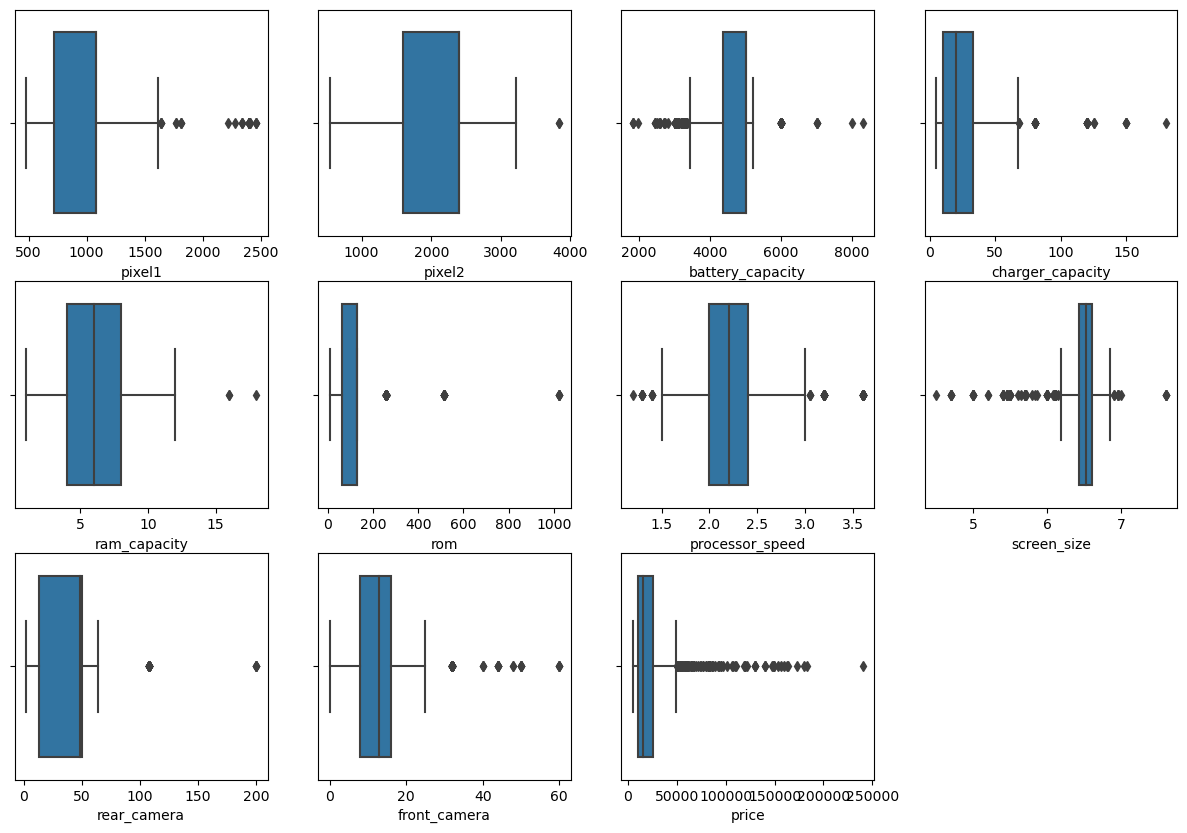

In [ ]:
col=['pixel1', 'pixel2', 'battery_capacity', 'charger_capacity',
     'ram_capacity', 'rom',
    'processor_speed', 'screen_size', 'rear_camera',
        'front_camera',
       'price']
plt.figure(figsize=(15,10))
n=1
for i in col:
    plt.subplot(3,4,n)
    sns.boxplot(x=dfnew[i])
    n=n+1

In [ ]:
dfnew[dfnew["pixel2"]>3500]

,pixel1,pixel2,company,battery_capacity,charger_capacity,fast_charging,ram_capacity,rom,5G,nfc,processor_name,processor_cores,processor_speed,screen_size,rear_camera,rear_camera_count,front_camera,front_camera_count,os_type,price
350,1644,3840,Sony,5000,30,1,12,512,yes,yes,Snapdragon,Octa,3.00,6.5,12,Quad,12.0,Single,Android,92980.0
721,1644,3840,Sony,4500,30,1,12,256,yes,yes,Snapdragon,Octa,2.84,6.5,12,Quad,8.0,Single,Android,83490.0


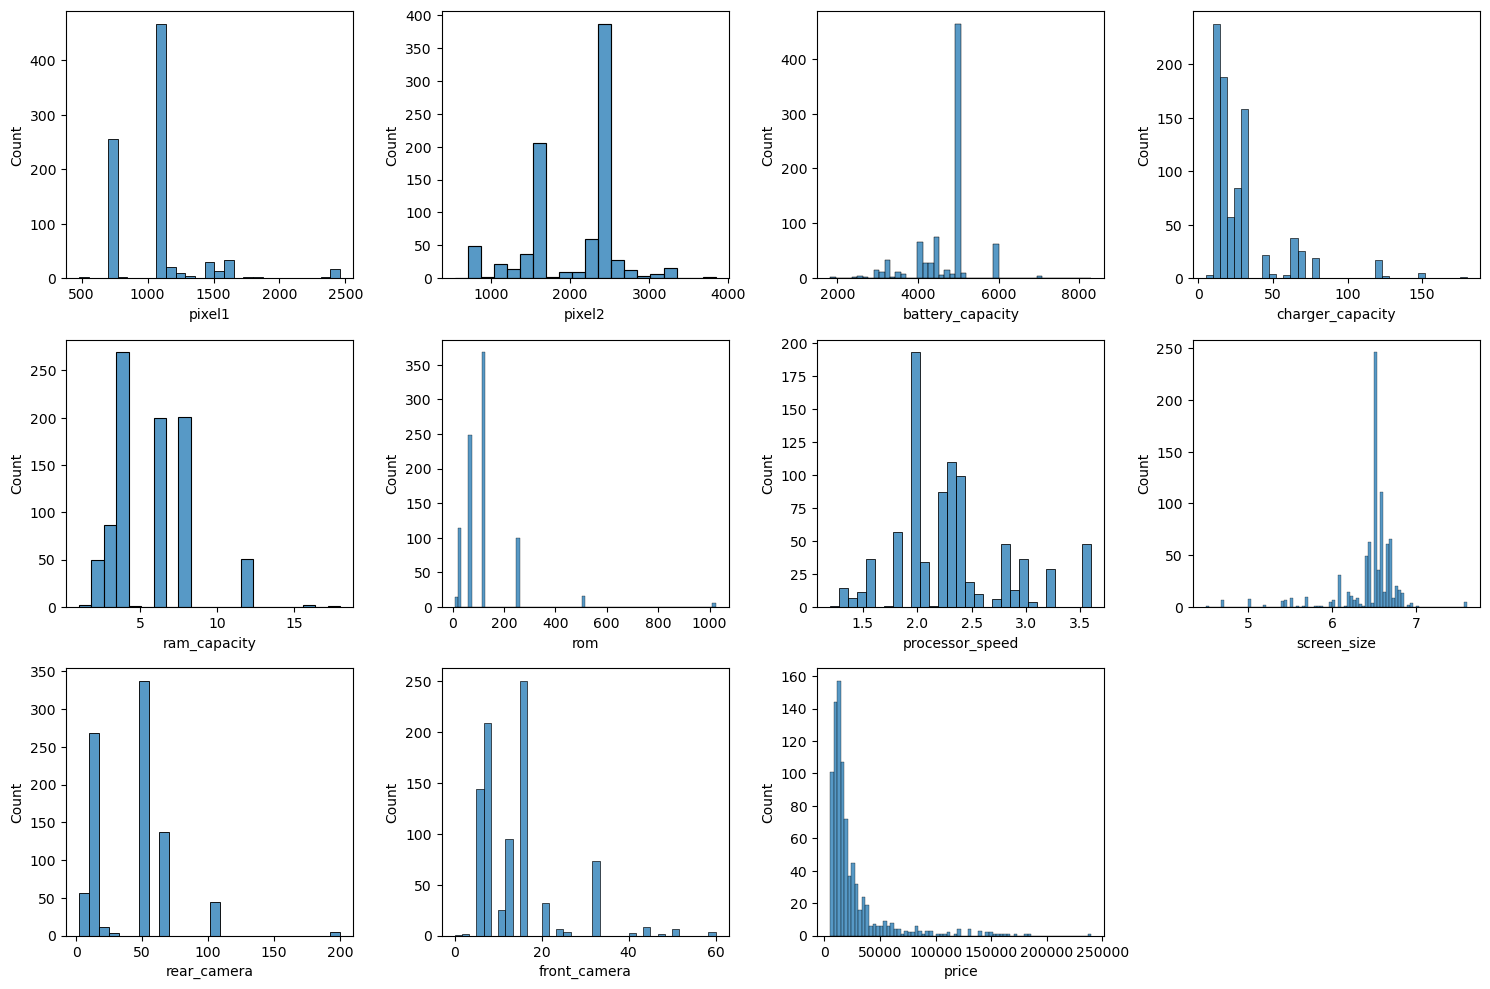

In [ ]:
col=['pixel1', 'pixel2', 'battery_capacity', 'charger_capacity',
     'ram_capacity', 'rom',
    'processor_speed', 'screen_size', 'rear_camera',
        'front_camera',
       'price']
plt.figure(figsize=(15,10))
n=1
for i in col:
    plt.subplot(3,4,n)
    sns.histplot(x=dfnew[i])
    n=n+1
plt.tight_layout()

In [ ]:
dfnew[dfnew["screen_size"]<5]


,pixel1,pixel2,company,battery_capacity,charger_capacity,fast_charging,ram_capacity,rom,5G,nfc,processor_name,processor_cores,processor_speed,screen_size,rear_camera,rear_camera_count,front_camera,front_camera_count,os_type,price
266,750,1334,Apple,3200,20,0,4,64,yes,yes,Bionic,Hexa,3.60,4.7,12,single,7.0,Single,iOS,43900.0
387,750,1334,Apple,1821,18,1,3,64,no,yes,Bionic,Hexa,3.60,4.7,12,single,7.0,Single,iOS,39900.0
533,750,1334,Apple,3200,20,0,4,128,yes,yes,Bionic,Hexa,3.60,4.7,12,single,7.0,Single,iOS,48900.0
591,750,1334,Apple,1821,18,1,3,128,no,yes,Bionic,Hexa,3.60,4.7,12,single,7.0,Single,iOS,44900.0
601,750,1334,Apple,1960,20,0,2,32,no,yes,Bionic,Quad,3.60,4.7,12,single,7.0,Single,iOS,31500.0
653,750,1334,Apple,3200,20,0,4,256,yes,yes,Bionic,Hexa,3.60,4.7,12,single,7.0,Single,iOS,58900.0
760,1440,1440,BlackBerry,3450,12,0,3,32,no,no,Snapdragon,Quad,2.26,4.5,13,single,2.0,Single,Blackberry,26999.0
942,750,1334,Apple,1821,18,1,3,256,no,yes,Bionic,Hexa,3.60,4.7,12,single,7.0,Single,iOS,54900.0


In [ ]:
dfnew["rear_camera_count"].value_counts()

Triple    407
Dual      196
Quad      161
single    100
Name: rear_camera_count, dtype: int64

In [ ]:
dfnew["front_camera_count"].value_counts()

Single    836
Dual       27
no          1
Name: front_camera_count, dtype: int64

In [ ]:
dfnew.head()

,pixel1,pixel2,company,battery_capacity,charger_capacity,fast_charging,ram_capacity,rom,5G,nfc,processor_name,processor_cores,processor_speed,screen_size,rear_camera,rear_camera_count,front_camera,front_camera_count,os_type,price
0,1080,2412,OnePlus,5000,33,1,6,128,yes,no,Snapdragon,Octa,2.2,6.59,64,Triple,16.0,Single,Android,18999.0
1,1080,2408,Samsung,5000,15,1,4,64,yes,no,Exynos,Octa,2.4,6.60,50,Triple,13.0,Single,Android,16499.0
2,1080,2408,Samsung,5000,25,1,6,128,yes,yes,Snapdragon,Octa,2.2,6.60,50,Triple,8.0,Single,Android,16999.0
3,1080,2400,Motorola,5000,25.0,1,6,128,yes,no,Snapdragon,Octa,2.2,6.55,50,Triple,16.0,Single,Android,14999.0
4,1080,2412,Realme,5000,67,1,6,128,yes,no,Dimensity,Octa,2.6,6.70,108,Triple,16.0,Single,Android,24999.0


# Feature engineering

In [ ]:
x=dfnew.drop(["price"],axis=1)
y=dfnew["price"]

In [ ]:
# dfnew["price"]=dfnew["price"].astype(int)
# ct = ColumnTransformer([("log_transform_price",FunctionTransformer(np.log1p,validate=False),["price"])],remainder="passthrough",verbose_feature_names_out=False)
# ct.set_output(transform="pandas")

In [ ]:
ct1=ColumnTransformer([("ordinal_cores",OrdinalEncoder(categories=[["Quad","Hexa","Octa","Deca"]]),["processor_cores"]),
                      ("ordinal_ostype",OrdinalEncoder(categories=[["Blackberry","Android","Hongmeng","iOS"]]),["os_type"]),
                      ("ordinal_rear_count",OrdinalEncoder(categories=[["single","Dual","Triple","Quad"]]),["rear_camera_count"]),
                      ("ordinal_front_count",OrdinalEncoder(categories=[["no","Single","Dual"]]),["front_camera_count"])],remainder="passthrough",verbose_feature_names_out=False)
ct1.set_output(transform='pandas')

ColumnTransformer(remainder='passthrough',
                  transformers=[('ordinal_cores',
                                 OrdinalEncoder(categories=[['Quad', 'Hexa',
                                                             'Octa', 'Deca']]),
                                 ['processor_cores']),
                                ('ordinal_ostype',
                                 OrdinalEncoder(categories=[['Blackberry',
                                                             'Android',
                                                             'Hongmeng',
                                                             'iOS']]),
                                 ['os_type']),
                                ('ordinal_rear_count',
                                 OrdinalEncoder(categories=[['single', 'Dual',
                                                             'Triple',
                                                             'Quad']]),
                                 ['rear_camera_count']),
                                ('ordinal_front_count',
                                 OrdinalEncoder(categories=[['no', 'Single',
                                                             'Dual']]),
                                 ['front_camera_count'])],
                  verbose_feature_names_out=False)

In [ ]:
ct2= ColumnTransformer([("one_hot_encoding",OneHotEncoder(drop="first",sparse=False),["company","5G","nfc","processor_name"])],remainder="passthrough",verbose_feature_names_out=False)
ct2.set_output(transform='pandas')

ColumnTransformer(remainder='passthrough',
                  transformers=[('one_hot_encoding',
                                 OneHotEncoder(drop='first', sparse=False),
                                 ['company', '5G', 'nfc', 'processor_name'])],
                  verbose_feature_names_out=False)

In [ ]:
ct3=ColumnTransformer([("scaler",StandardScaler(),['pixel1', 'pixel2', 'battery_capacity', 'charger_capacity',
     'ram_capacity', 'rom','processor_speed', 'screen_size', 'rear_camera','front_camera', ])])
# ct3.set_output(transform='pandas')

In [ ]:
pipe=Pipeline([("Orinal Encoding",ct1),
           ("ONEHOT Encoding",ct2),
           ("Scaling",ct3)])

In [ ]:
x=pipe.fit_transform(x)

## Splitting and Training model

In [ ]:
xtrain,xtest ,ytrain,ytest =train_test_split(x,y, test_size=0.3,random_state=55)


In [ ]:
rf=RandomForestRegressor()
rf.fit(xtrain,ytrain)

RandomForestRegressor()

In [ ]:
r2_score(ytrain,rf.predict(xtrain))

0.9838743549273951

In [ ]:
r2_score(ytest,rf.predict(xtest))

0.9283008639447808

## Hyperparameter Tuning

In [ ]:
params=[{"max_depth":[5,9],"min_samples_split":[10,20,30]}]
gsv=GridSearchCV(rf,cv=5,param_grid=params,n_jobs=-1,scoring="r2")

In [ ]:
gsv.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid=[{'max_depth': [5, 9],
                          'min_samples_split': [10, 20, 30]}],
             scoring='r2')

In [ ]:
gsv.best_estimator_

RandomForestRegressor(max_depth=9, min_samples_split=10)

# Retraining after Tuning Hyperparameters

In [ ]:
rf=RandomForestRegressor(max_depth=9, min_samples_split=20)
rf.fit(xtrain,ytrain)

RandomForestRegressor(max_depth=9, min_samples_split=20)

In [ ]:
print(r2_score(ytrain,rf.predict(xtrain)))
r2_score(ytest,rf.predict(xtest))

0.9035474592720295


0.8853390457959834

In [ ]:
pickle.dump(pipe,open("transform.pkl","wb"))
pickle.dump(rf,open("random_forest.pkl","wb"))